# Importing Libraries

In [27]:
# Importing necessary libraries for data manipulation
import pandas as pd  # Powerful data structures for data analysis, time series, and statistics
import numpy as np  # Fundamental package for scientific computing with Python

# Importing libraries for data visualization
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting library for Python

# Importing machine learning utilities
from sklearn.model_selection import train_test_split  # Utility to split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Metrics to evaluate the performance of a model
from sklearn.preprocessing import LabelEncoder # Label Encoder

# Importing TensorFlow libraries for building the GRU model
import tensorflow as tf  # Deep learning library
from tensorflow.keras.models import Sequential  # Sequential model type from Keras
from tensorflow.keras.layers import Dense, GRU, Dropout  # Layers used to build the neural network
from tensorflow.keras.utils import to_categorical # Categorical of data

# Setting visualization styles
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)  # Setting default figure size for plots

# Fix the seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Print TensorFlow version
print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0



### Explanation:

1. **Pandas (`pd`)**: Used for data manipulation and analysis. It provides data structures and functions needed to manipulate structured data effortlessly.
2. **NumPy (`np`)**: Fundamental package for scientific computing with Python, providing comprehensive mathematical functions and array handling.
3. **Seaborn (`sns`)**: A library for making statistical graphics in Python. It is built on top of Matplotlib and closely integrated with Pandas data structures.
4. **Matplotlib (`plt`)**: A plotting library used for 2D graphics. It is very useful for visualizing data and creating plots.
5. **Scikit-learn**:
   - `train_test_split`: Used to split the dataset into training and testing sets.
   - `StandardScaler`: Used for feature scaling, ensuring standardized value ranges for models.
   - `classification_report`, `accuracy_score`, `confusion_matrix`: Provide metrics to assess model performance.
6. **TensorFlow (`tf`)**: An end-to-end open-source platform for machine learning.
   - `Sequential`: Model class that allows us to build models layer by layer.
   - `Dense`, `GRU`, `Dropout`: Different layers we'll use in our deep learning model.
7. **Seeding for Reproducibility**: Setting the random seed ensures that the random operations are reproducible which is useful for debugging.

In this section, we've prepared our workspace by loading the necessary libraries. Next, we will proceed to load and explore the dataset in subsection 2.

## 2. Load the Data
### 2.1 Loading the Data

Now, we will load our dataset files (`train.csv`, `test.csv`, and `val.csv`) into Pandas DataFrames. This is the first step in any data analysis workflow, and it allows us to begin exploring and understanding our data.

In [28]:
# Load the datasets
train_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/train.csv', on_bad_lines='skip')
test_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/test.csv', on_bad_lines='skip')
val_df = pd.read_csv('/kaggle/input/social-media-usage-and-emotional-well-being/val.csv', on_bad_lines='skip')

# Display the first few rows of the training data
print("First 5 rows of the training data:")
train_df.head()

First 5 rows of the training data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


### 2.2 Understanding the Data

Let's explore the basic structure of the DataFrames to understand the data we are working with. We will look at data types, summary statistics, and check for any missing values.

In [29]:
# Display the structure of the training data
print("Information about the training data:")
train_df.info()

# Display summary statistics
print("\nSummary statistics of the training data:")
train_df.describe()

# Check for missing values
print("\nMissing values in the training data:")
train_df.isnull().sum()

Information about the training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB

Summary statistics of the training data:

Missing values in the training data:


User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

### 2.3 Preview the Test and Validation Data

Let's also take a quick look at the test and validation datasets to ensure they have similar structures to the training dataset.

In [30]:
# Display the first few rows of the test data
print("First 5 rows of the test data:")
test_df.head()

# Check for missing values in the test data
print("\nMissing values in the test data:")
test_df.isnull().sum()

# Display the first few rows of the validation data
print("First 5 rows of the validation data:")
val_df.head()

# Check for missing values in the validation data
print("\nMissing values in the validation data:")
val_df.isnull().sum()

First 5 rows of the test data:

Missing values in the test data:
First 5 rows of the validation data:

Missing values in the validation data:


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              1
dtype: int64

### Conclusion of Step 2

We have successfully loaded our datasets and obtained an overview of their structure. The next step will involve conducting an exploratory data analysis (EDA) to uncover patterns and insights within the data.

# 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) helps us understand the data better by summarizing its main characteristics, often using visual methods. This section will cover various aspects of our dataset to uncover patterns, spot anomalies, and check assumptions.

## 3.1 Data Overview

Let's start by getting an overview of our datasets. We will look at the head of the DataFrame to see the first few rows and understand the structure comprehensively. 

In [31]:
# Display the first few rows of each dataset
print("First 5 rows of the training data:")
display(train_df.head())

print("\nFirst 5 rows of the test data:")
display(test_df.head())

print("\nFirst 5 rows of the validation data:")
display(val_df.head())

First 5 rows of the training data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom



First 5 rows of the test data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral



First 5 rows of the validation data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31,Male,Instagram,170,5,80,20,35,Happiness
1,877,32,Female,Instagram,155,6,75,25,38,Happiness
2,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety


## 3.2 Distribution of Age

Next, we will examine the age distribution of users in our dataset. Understanding age distribution is crucial as it offers insights into the demographic characteristics of the users.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



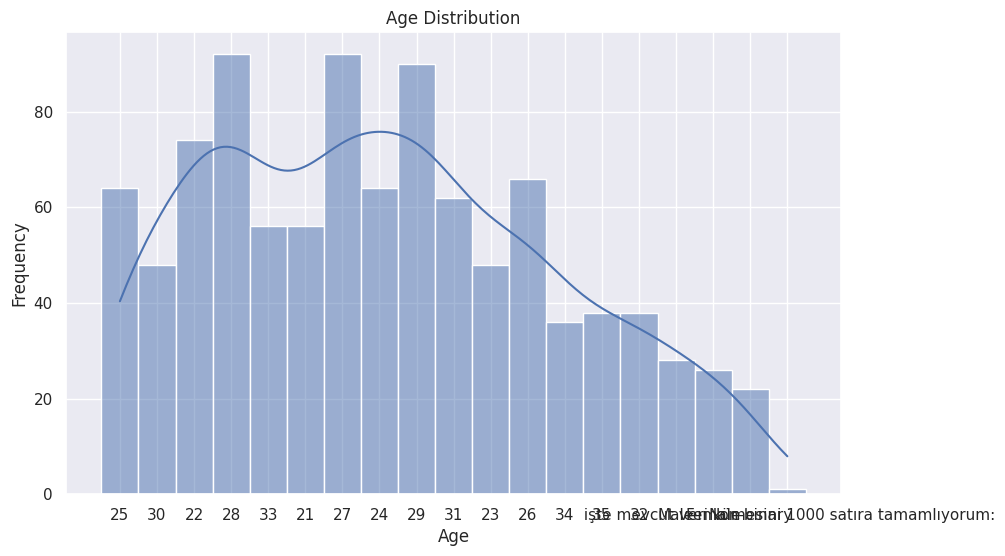

In [32]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 3.3 Gender Distribution

Let's visualize the distribution of genders in our training set. This will help us understand the gender diversity within our dataset.

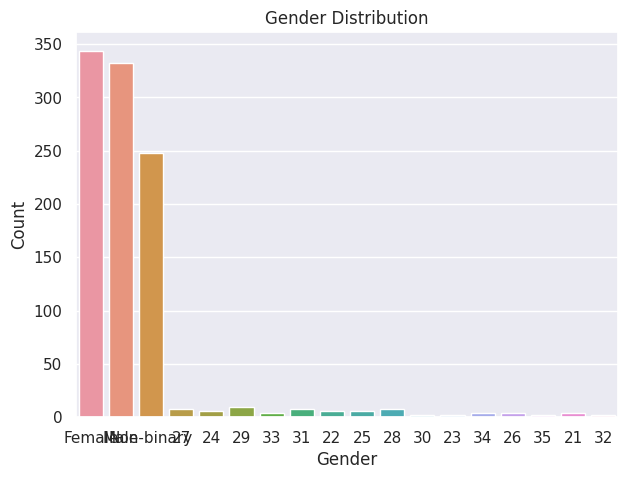

In [33]:
# Plot gender distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=train_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 3.4 Daily Usage Time by Platform

Analyzing how much time users spend on different social media platforms can reveal behavioral patterns. We will visualize the average daily usage time for each platform.

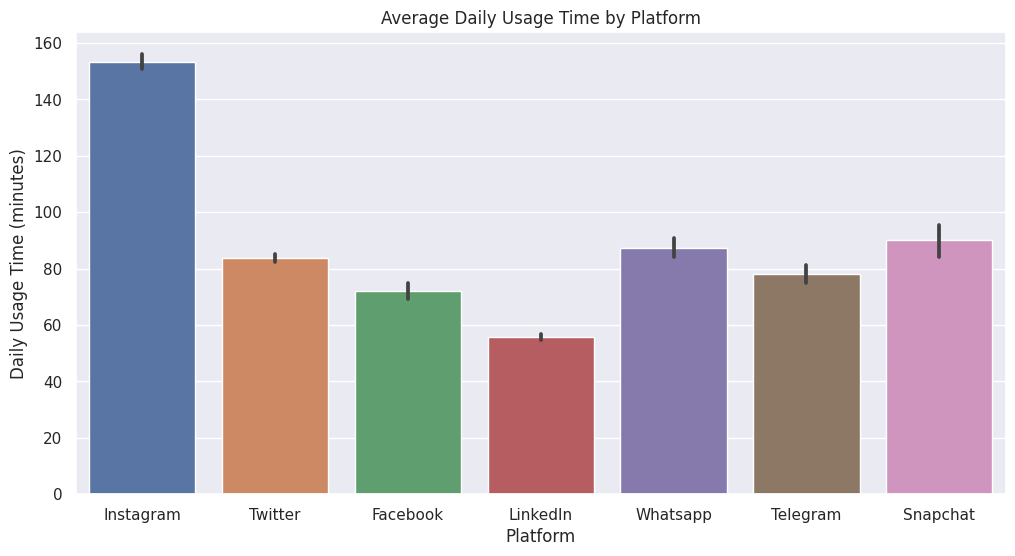

In [34]:
# Plot average daily usage time by platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=train_df, estimator=np.mean)
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

## 3.5 Dominant Emotion Distribution

Finally, let's look at the distribution of dominant emotions among users. This will give us an idea of the most prevalent emotional states represented in our dataset.

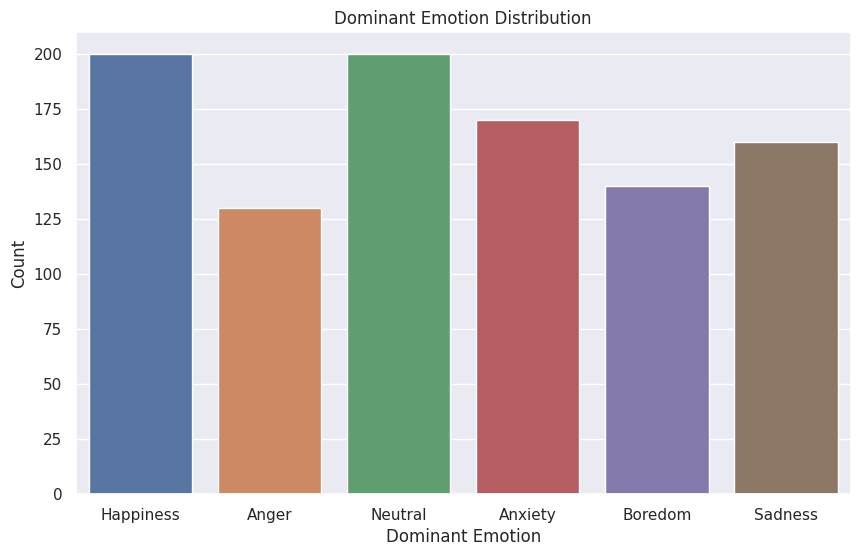

In [35]:
# Plot dominant emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Emotion', data=train_df)
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()

### Conclusion of Step 3

Through Exploratory Data Analysis (EDA), we have gained a comprehensive understanding of our data. We explored the age and gender distributions, daily usage time across different platforms, and the distribution of dominant emotions. These insights will guide us through the data preprocessing and modeling phases.

# 4. Data Preprocessing

Data preprocessing involves preparing and transforming raw data before it is used in modeling. This step ensures that the data is clean, well-formatted, and ready for training machine learning models.

## 4.1 Handling Missing Values

We begin by checking for and handling any missing values in the dataset. Missing values can skew the results and affect the performance of machine learning models.

In [36]:
# Check for missing values in the training dataset
print("Missing values in training data:")
print(train_df.isnull().sum())

# Check for missing values in the test dataset
print("\nMissing values in test data:")
print(test_df.isnull().sum())

# Check for missing values in the validation dataset
print("\nMissing values in validation data:")
print(val_df.isnull().sum())

# Handling missing values (if any) - here, we'll just drop rows with missing values for simplicity
# In a real-world scenario, you might want to impute missing values instead
train_df = train_df.dropna()
test_df = test_df.dropna()
val_df = val_df.dropna()

# Verify that there are no more missing values
print("\nMissing values in training data after dropping rows with missing values:")
print(train_df.isnull().sum())

Missing values in training data:
User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

Missing values in test data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

Missing values in validation data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Re

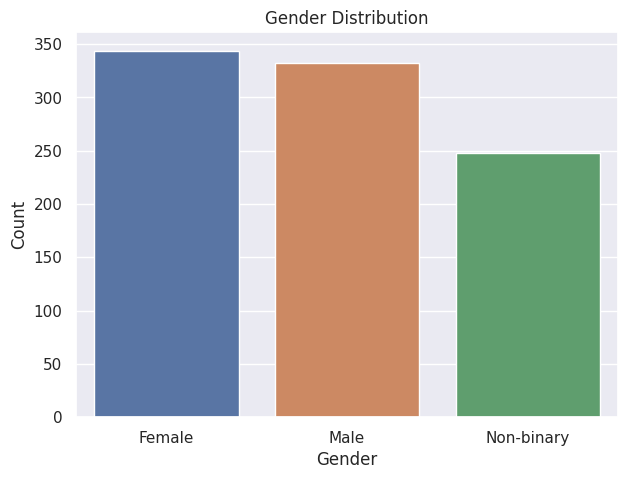

In [37]:
#remove all columns except female,male and non-binary from gender distribution

train_df = train_df[train_df['Gender'].isin(['Female', 'Male', 'Non-binary'])]

# Plot gender distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=train_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Daily Usage Time (minutes)')

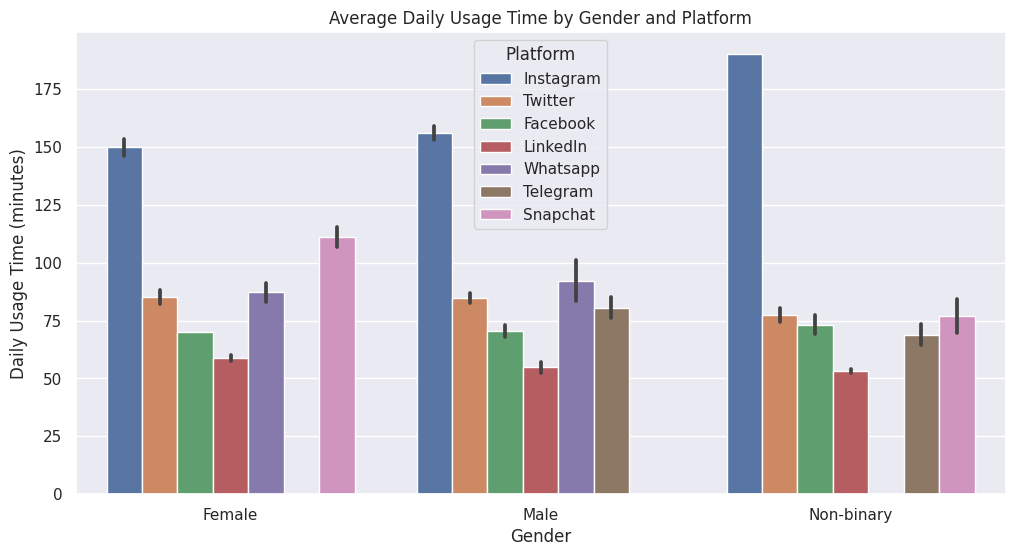

In [38]:
# piechart with Daily_Usage_Time (minutes) by Gender and Platform

plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Daily_Usage_Time (minutes)', hue='Platform', data=train_df, estimator=np.mean)
plt.title('Average Daily Usage Time by Gender and Platform')
plt.xlabel('Gender')
plt.ylabel('Daily Usage Time (minutes)')

In [39]:
# For more information about this
import plotly.express as py
py.sunburst(train_df, path=['Gender'], values='Daily_Usage_Time (minutes)', title='Daily_Usage_Time (minutes) by Gender and Platform')

## 4.2 Encoding Categorical Variables

Many machine learning algorithms require numerical input. We need to convert categorical variables such as 'Gender' and 'Platform' into numerical values. This process is called encoding. We'll use one-hot encoding to handle these categorical variables.

In [40]:
# One-hot encode the categorical variables for train, test, and validation sets
train_df = pd.get_dummies(train_df, columns=['Gender', 'Platform'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gender', 'Platform'], drop_first=True)
val_df = pd.get_dummies(val_df, columns=['Gender', 'Platform'], drop_first=True)

# Ensure that the columns match in train, test, and validation sets
# Align the test and validation sets with the training set
missing_cols_test = set(train_df.columns) - set(test_df.columns)
for col in missing_cols_test:
    test_df[col] = 0
test_df = test_df[train_df.columns]

missing_cols_val = set(train_df.columns) - set(val_df.columns)
for col in missing_cols_val:
    val_df[col] = 0
val_df = val_df[train_df.columns]

# Verify the changes
print("Columns in training data:", train_df.columns)
print("\nColumns in test data after encoding and alignment:", test_df.columns)
print("\nColumns in validation data after encoding and alignment:", val_df.columns)

Columns in training data: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_Male',
       'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn',
       'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter',
       'Platform_Whatsapp'],
      dtype='object')

Columns in test data after encoding and alignment: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_Male',
       'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn',
       'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter',
       'Platform_Whatsapp'],
      dtype='object')

Columns in validation data after encoding and alignment: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       '

## 4.3 Feature Scaling

Feature scaling is essential for neural networks. It ensures that each feature contributes proportionally to the calculations in algorithms and speeds up convergence in gradient-based algorithms. We'll use `StandardScaler` to scale the features.

In [41]:
# Ensure that we use consistent label encoding for the target variable across all data splits
label_encoder = LabelEncoder()

# Combine all the labels from train, test, and validation sets to create a unified label encoder
all_labels = list(train_df['Dominant_Emotion']) + list(test_df['Dominant_Emotion']) + list(val_df['Dominant_Emotion'])
label_encoder.fit(all_labels)

# Encode the target variable in each dataset
y_train_encoded = label_encoder.transform(train_df['Dominant_Emotion'])
y_test_encoded = label_encoder.transform(test_df['Dominant_Emotion'])
y_val_encoded = label_encoder.transform(val_df['Dominant_Emotion'])

# Define features and target variable for each dataset
X_train = train_df.drop('Dominant_Emotion', axis=1)
X_test = test_df.drop('Dominant_Emotion', axis=1)
X_val = val_df.drop('Dominant_Emotion', axis=1)

# Verify the feature names
print("Feature names in train data:", X_train.columns.tolist())
print("Feature names in test data:", X_test.columns.tolist())
print("Feature names in validation data:", X_val.columns.tolist())

# Select only numeric columns for scaling
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Verify the numeric columns
print("Numeric columns in the dataset:", numeric_columns)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_val_scaled = scaler.transform(X_val[numeric_columns])

# Verify the scaling
print("Scaled feature sample (first 5 rows of the training data):")
print(X_train_scaled[:5])

Feature names in train data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']
Feature names in test data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']
Feature names in validation data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_Male', 'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platf

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



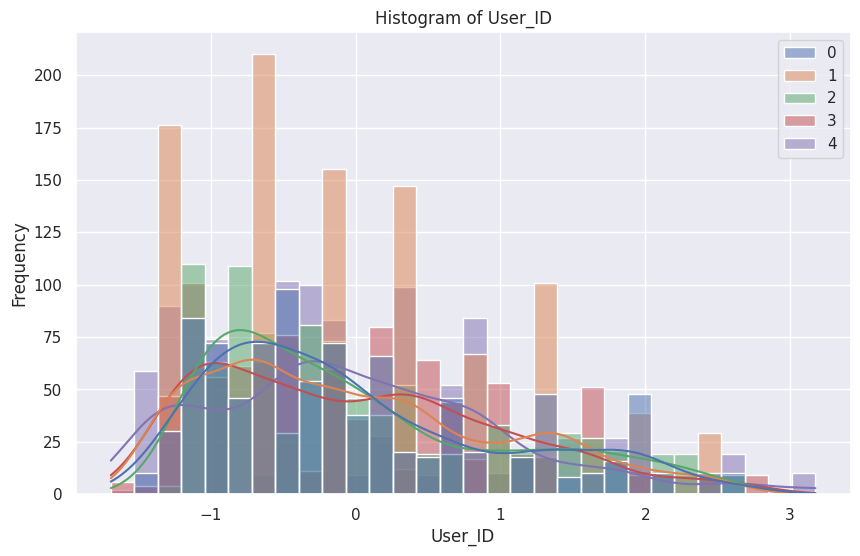

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

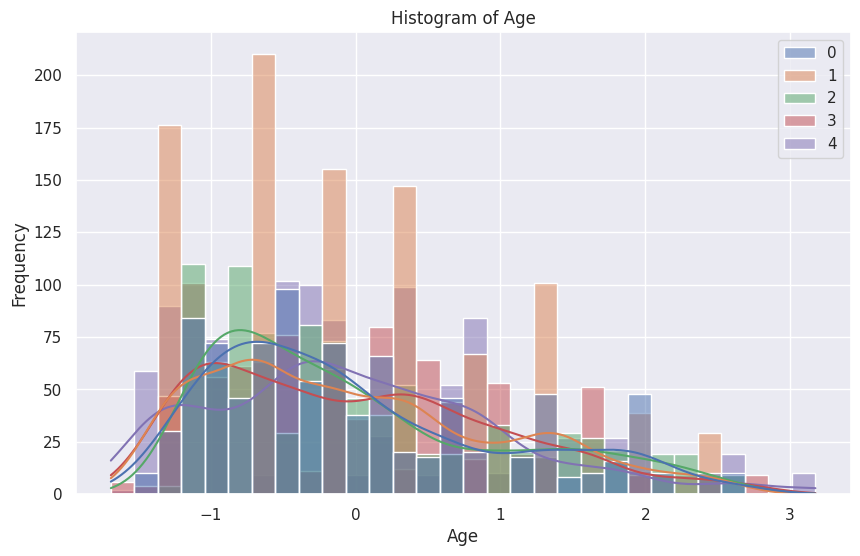

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

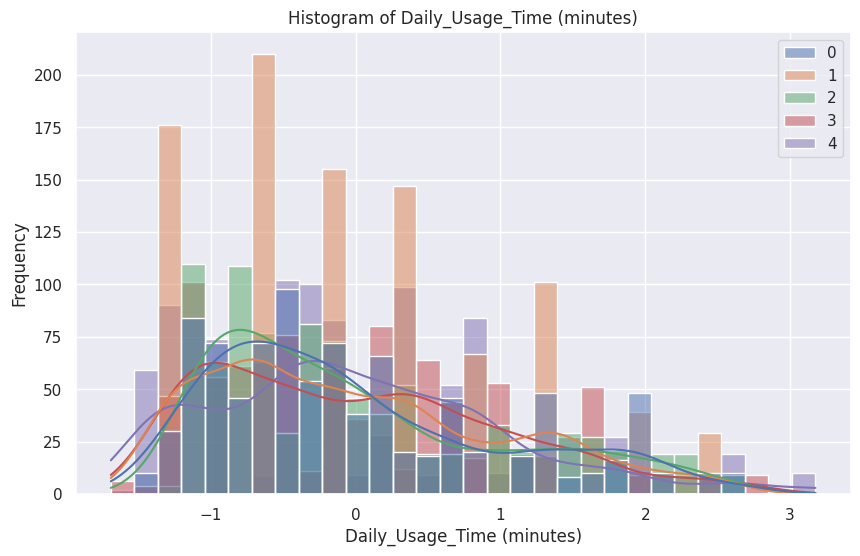

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

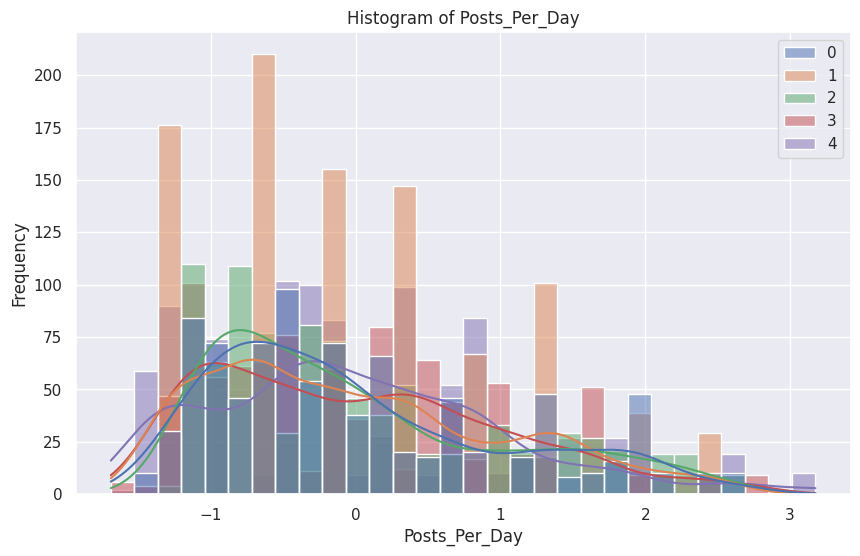

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

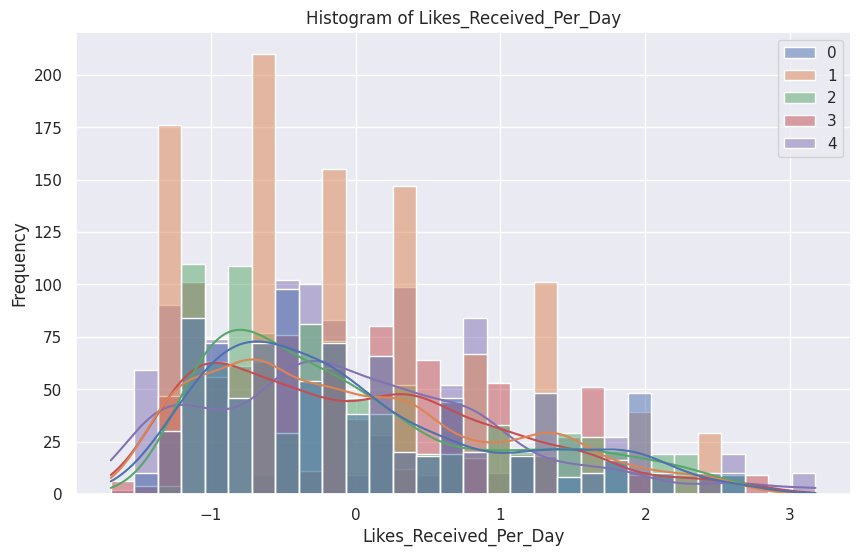

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

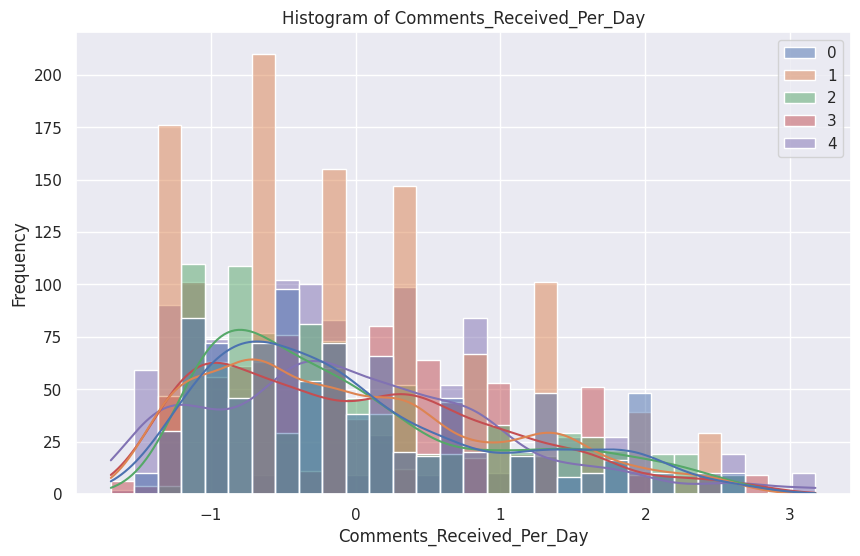

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

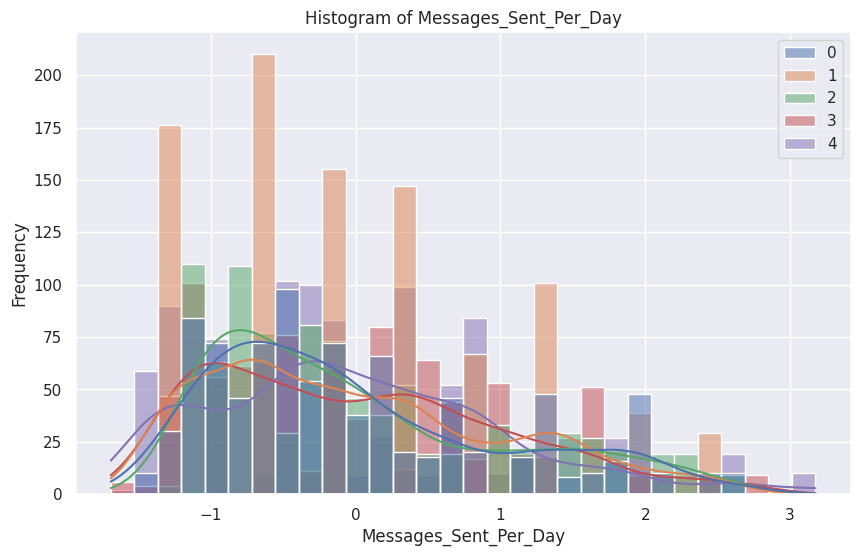

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

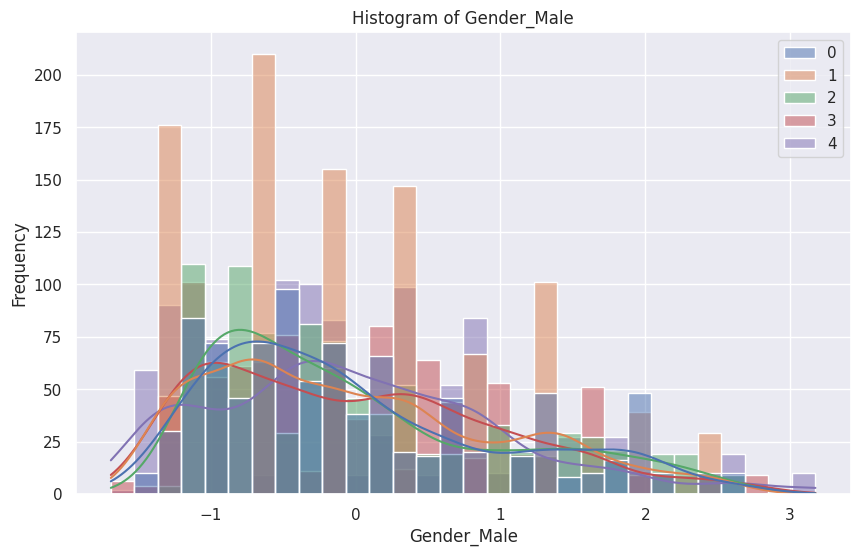

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

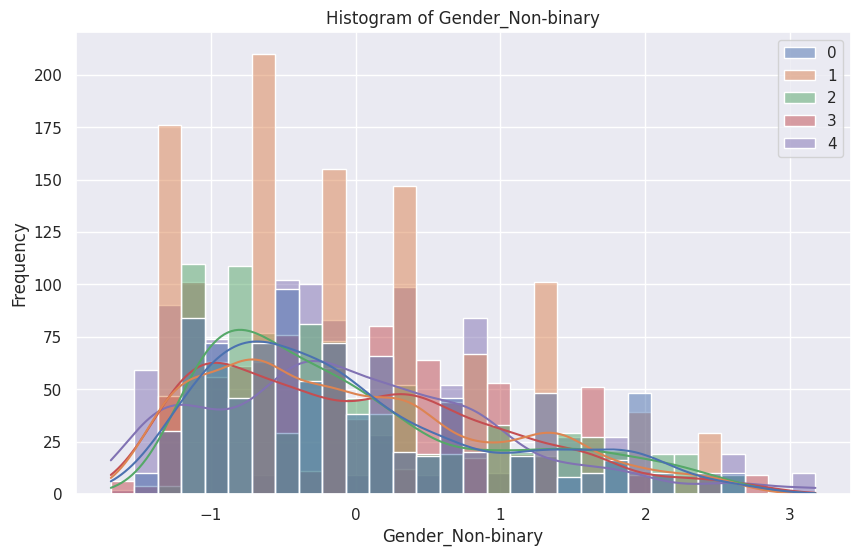

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

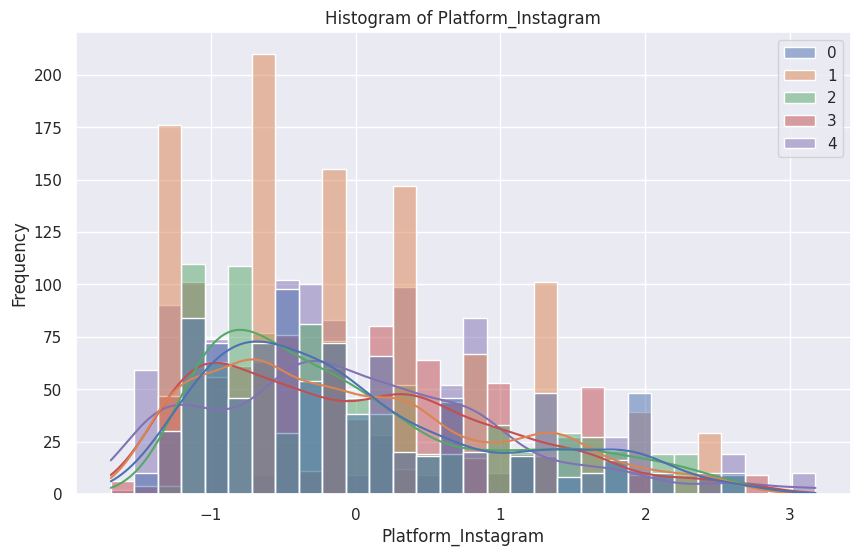

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

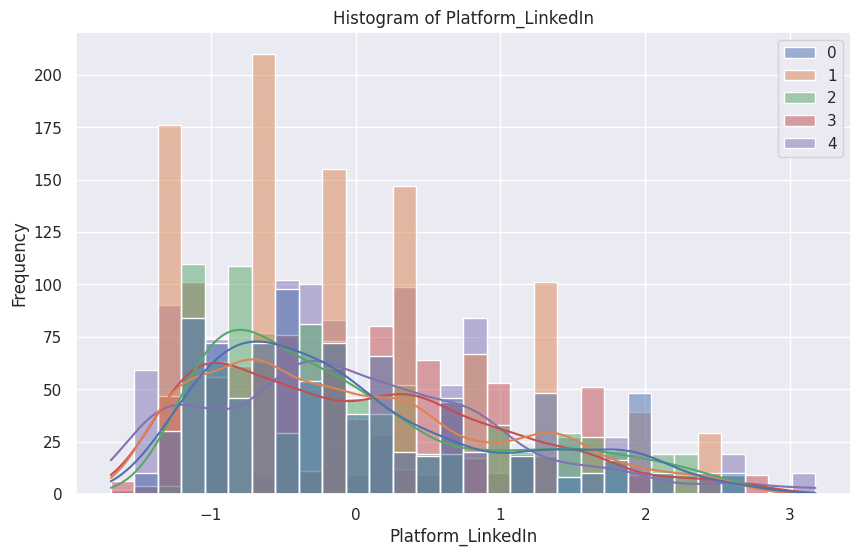

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

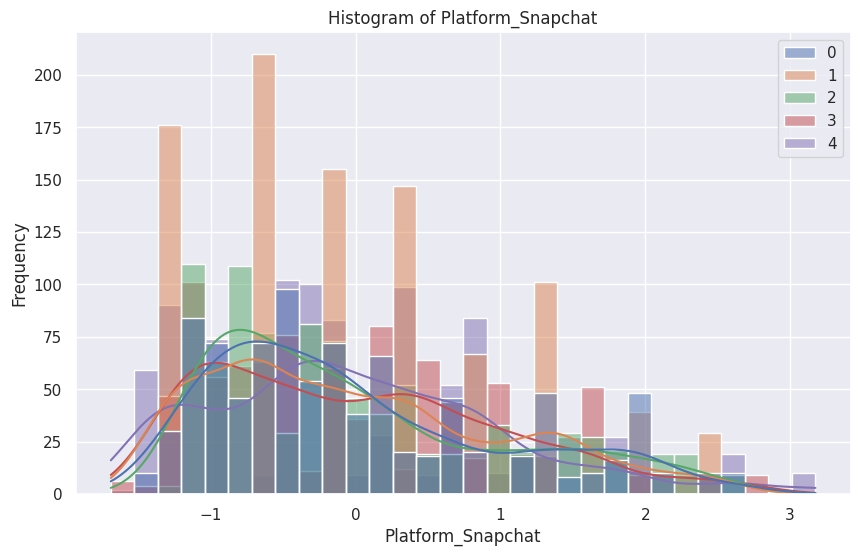

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

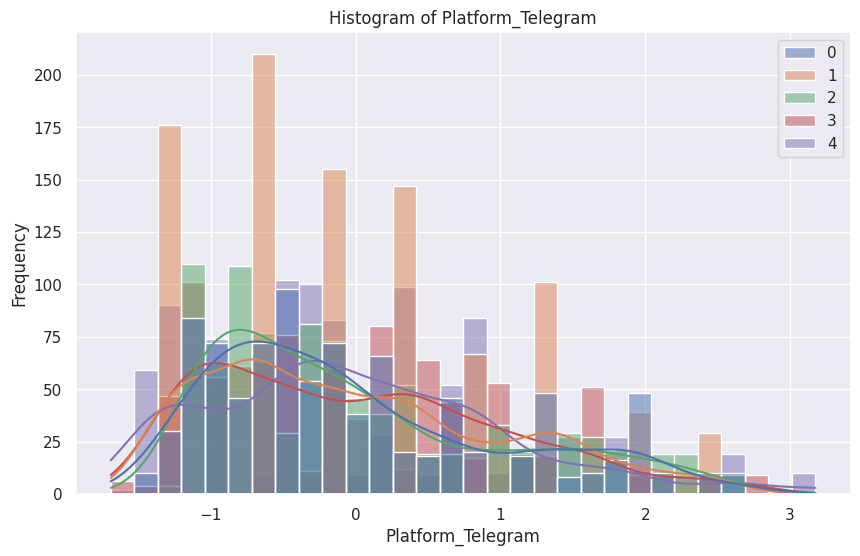

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

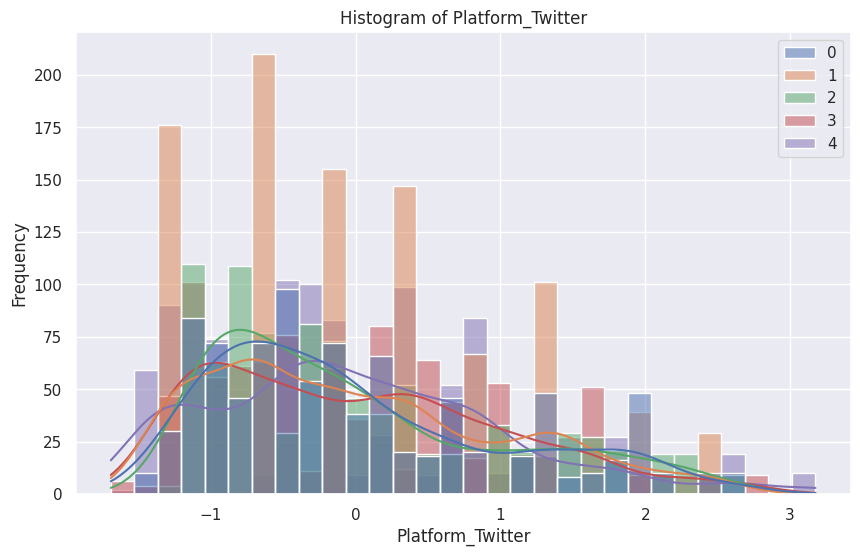

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

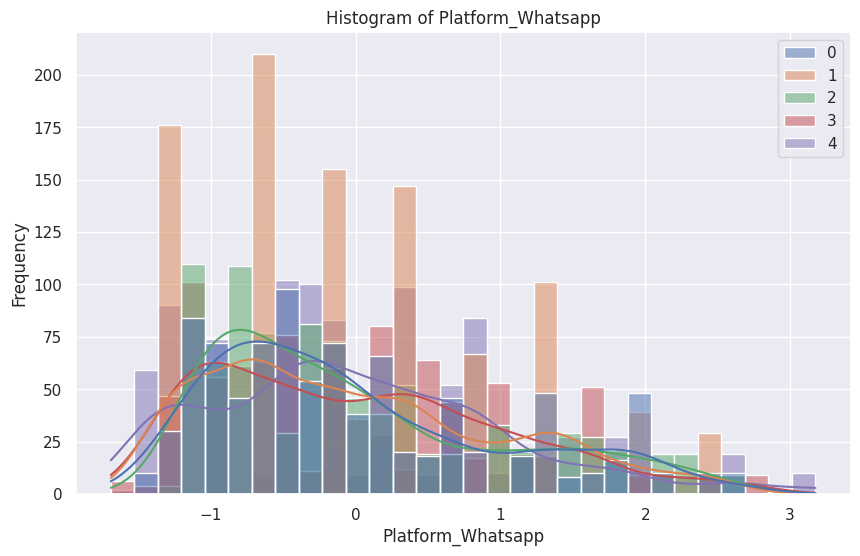

<Figure size 1200x600 with 0 Axes>

In [42]:
#feature visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot all features
sns.set()

for feature in X_train.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train_scaled, kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    plt.close()
    plt.clf()

### Conclusion of Step 4

We have successfully preprocessed our data by handling missing values, encoding categorical variables, and scaling the features. Our data is now ready for building a neural network model. In the next step, we will construct and train a GRU (Gated Recurrent Unit) neural network to predict the dominant emotion of the user.

In [43]:
# feature extraction using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Verify the feature names
print("Feature names in train data:", X_train_pca.tolist())
print("Feature names in test data:", X_test_pca.tolist())
print("Feature names in validation data:", X_val_pca.tolist())

X_train = X_train_pca
X_test = X_test_pca
X_val = X_val_pca

y_train = y_train_encoded
y_test = y_test_encoded
y_val = y_val_encoded

Feature names in train data: [[-0.5592930166153948, -0.09755796869765761, 1.2936061177784004, 0.586290260210886, -0.09134910506734131], [0.8077228259805589, -0.48112355538713425, -1.246758428478226, -0.27124647872754937, -0.7905406923357607], [-1.8217945893639722, 0.36858209783263574, -0.46446560767933087, 0.2840508520348929, 0.11365112023167438], [5.384310359727906, 0.9206139779335513, -0.4565139387094053, 0.5628451773968486, 0.009902861124078401], [-3.0553381265207182, -0.03953421459286406, 0.09557027548616291, 0.23980599969312688, 0.053242863606929654], [1.1844403923602354, 0.5676535517407134, 0.785728532358953, 0.5085485199704429, -0.1217836083731082], [-0.905294205607413, -0.04332220055629132, 0.10710872169410769, 0.3521271595172104, 0.0018095668814755628], [0.28922860687893726, -0.4457158498735189, -0.3753154776286307, 1.302995275527362, -0.6101454315763983], [-2.6797102580983894, -0.4020234964557269, 0.31524087934958134, 0.5651988060454871, -0.020888307973910263], [2.74447924814

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



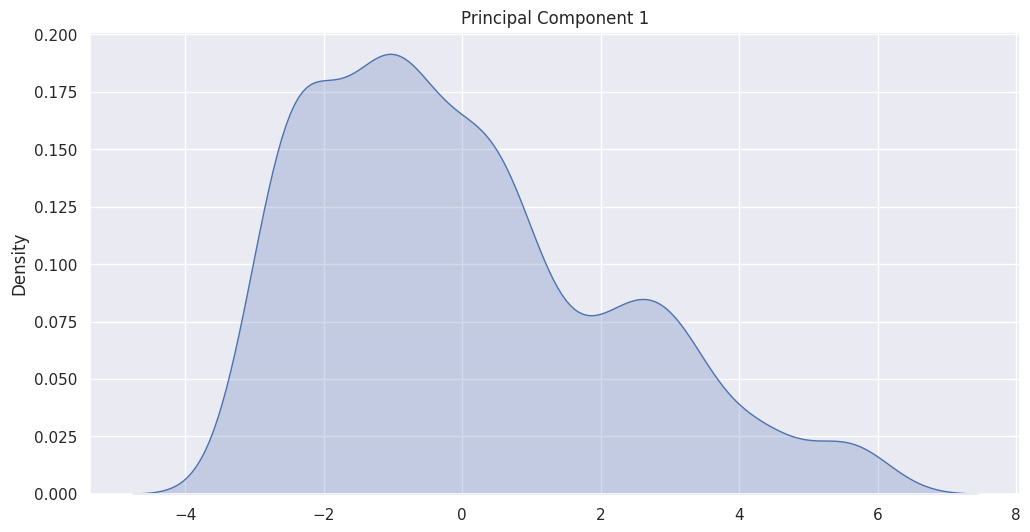

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

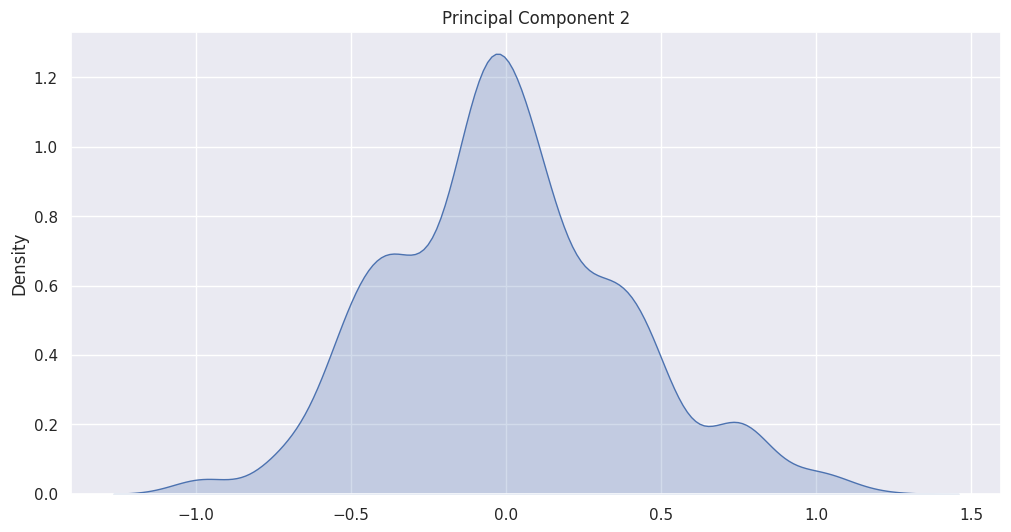

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

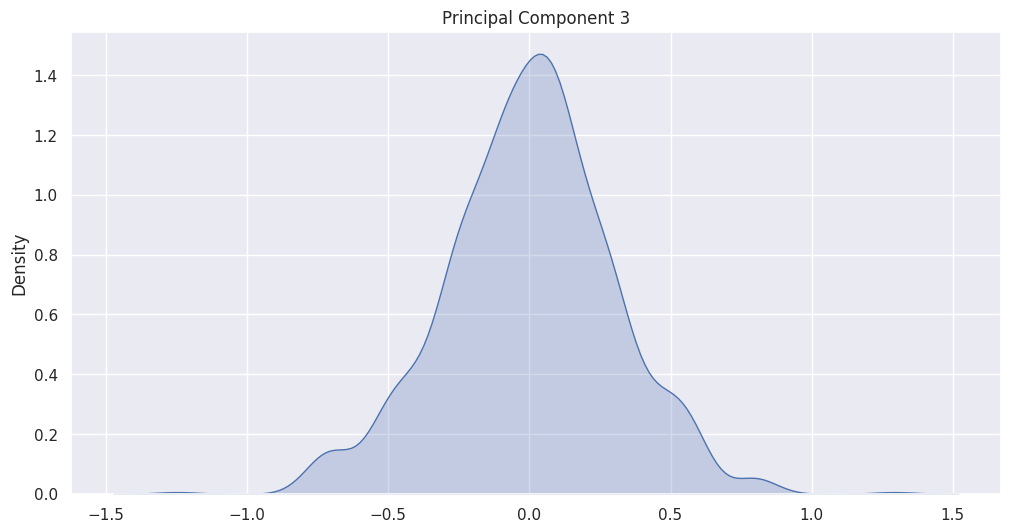

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

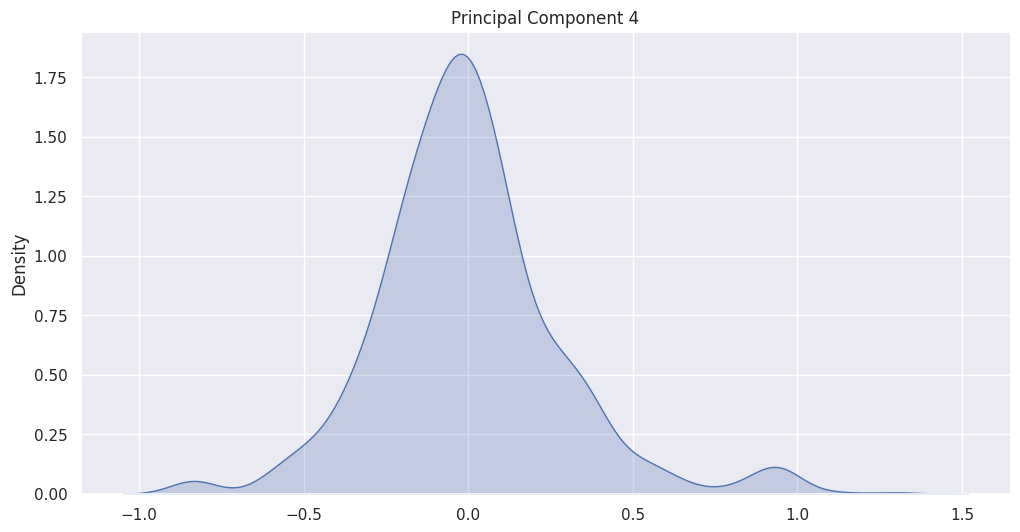

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1200x600 with 0 Axes>

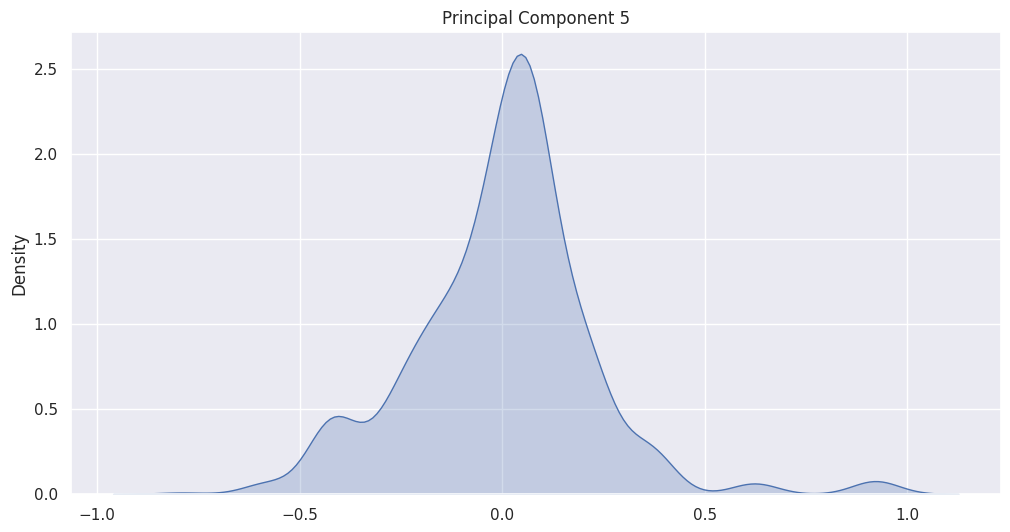

<Figure size 1200x600 with 0 Axes>

In [44]:
#extracted features visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Plot all principal components
sns.set()

for i in range(X_train_pca.shape[1]):
    plt.figure()
    sns.kdeplot(X_train_pca[:, i], fill=True)
    plt.title(f'Principal Component {i+1}')
    plt.show()
    plt.close()
    plt.clf()

In [45]:
# feature selection using rfe
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train_encoded)
X_test_rfe = rfe.transform(X_test_scaled)
X_val_rfe = rfe.transform(X_val_scaled)

# Verify the feature names
print("Feature names in train data:", X_train_rfe.tolist())
print("Feature names in test data:", X_test_rfe.tolist())
print("Feature names in validation data:", X_val_rfe.tolist())

X_train = X_train_rfe
X_test = X_test_rfe
X_val = X_val_rfe

y_train = y_train_encoded
y_test = y_test_encoded
y_val = y_val_encoded

Feature names in train data: [[0.6042403484307411, -0.1802793630507112, 0.17746132985428043, -0.6413202220317081, -1.2277755306510683], [-0.16092833400416726, 0.8511641753942252, -0.7559076864558004, 1.038645432354887, 0.8580633483876006], [-0.9260970164390757, -0.6960011322731794, -0.9425814897178165, -1.2013087734939065, -0.30073602885610434], [2.6446901682571635, 2.3983294830616297, 2.230873165736458, 1.5986339838170853, 3.1756621028750107], [-1.30868135765653, -1.2117229014956477, -1.3159290962418488, -1.5373019043712255, -1.4595354060998094], [1.3694090308656497, 0.33544240617175697, 0.737482739640329, -0.08133167056950978, 0.27866365976574814], [-0.2884564477433187, -0.1802793630507112, -0.38256007993176805, -0.6413202220317081, -0.5324959043048454], [0.34918412095243834, 1.3668859446166934, -0.5692338831937842, -0.4173248014468288, -0.06897615340736335], [-1.0536251301782271, -0.6960011322731794, -1.1292552929798327, -1.4253041940787858, -1.6912952815485502], [1.8795214858222553

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# List of models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.1)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('AdaBoost', AdaBoostRegressor(n_estimators=100, random_state=42)),
    ('Support Vector Regression', SVR(C=1.0, epsilon=0.2)),
    ('K-Nearest Neighbors', KNeighborsRegressor(n_neighbors=5)),
    ('Extra Trees', ExtraTreesRegressor(n_estimators=100, random_state=42)),

    # Voting Regressor (combines different base models)
    ('Voting Regressor', VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ])),

    # Stacking Regressor (meta-model combining multiple base models)
    ('Stacking Regressor', StackingRegressor(estimators=[
        ('dt', DecisionTreeRegressor(random_state=42)),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ], final_estimator=LinearRegression()))
]

# For each model, fit, predict, and evaluate
for model_name, model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Evaluation Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_mse = mean_squared_error(y_test, test_predictions)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Pseudo-accuracy for regression
    tolerance = 0.1 * np.mean(y_test)  # 10% of the mean of actual values
    train_accuracy = np.mean(np.abs(train_predictions - y_train) <= tolerance) * 100
    test_accuracy = np.mean(np.abs(test_predictions - y_test) <= tolerance) * 100

    # Print metrics
    print(f"{model_name} Metrics:")
    print(f"Training Accuracy: {train_accuracy:.2f}%")
    print(f"Testing Accuracy: {test_accuracy:.2f}%")
    print(f"Testing MSE: {test_mse:.4f}")
    print(f"Testing RMSE: {test_rmse:.4f}")
    print(f"Training R^2 Score: {train_r2:.4f}")
    print(f"Testing R^2 Score: {test_r2:.4f}")
    print('-' * 50)


Linear Regression Metrics:
Training Accuracy: 9.42%
Testing Accuracy: 7.77%
Testing MSE: 2.3499
Testing RMSE: 1.5329
Training R^2 Score: 0.0988
Testing R^2 Score: 0.0679
--------------------------------------------------
Ridge Regression Metrics:
Training Accuracy: 9.42%
Testing Accuracy: 7.77%
Testing MSE: 2.3495
Testing RMSE: 1.5328
Training R^2 Score: 0.0987
Testing R^2 Score: 0.0680
--------------------------------------------------
Lasso Regression Metrics:
Training Accuracy: 0.32%
Testing Accuracy: 0.00%
Testing MSE: 2.4997
Testing RMSE: 1.5810
Training R^2 Score: 0.0099
Testing R^2 Score: 0.0085
--------------------------------------------------
Decision Tree Metrics:
Training Accuracy: 100.00%
Testing Accuracy: 96.12%
Testing MSE: 0.2233
Testing RMSE: 0.4725
Training R^2 Score: 1.0000
Testing R^2 Score: 0.9114
--------------------------------------------------
Random Forest Metrics:
Training Accuracy: 94.70%
Testing Accuracy: 87.38%
Testing MSE: 0.3091
Testing RMSE: 0.5560
Trai

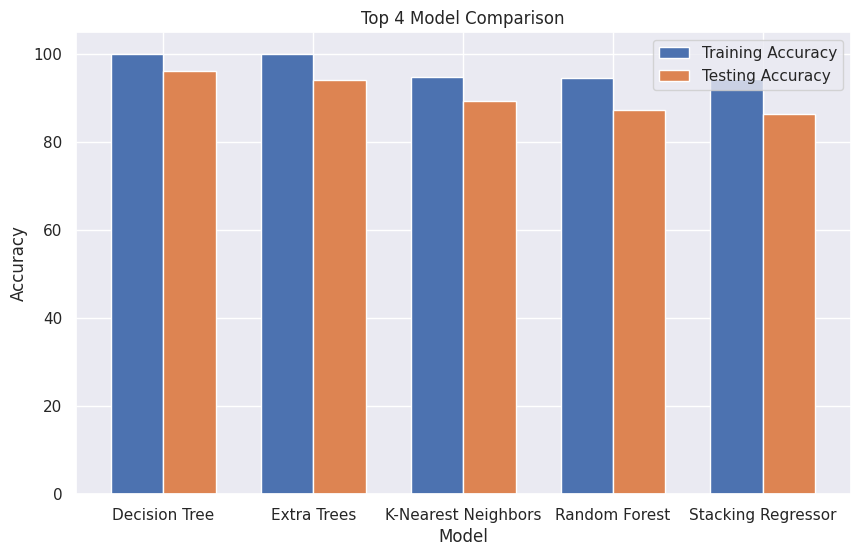

In [49]:
model_names = [model_name for model_name, _ in models]
train_accuracies = []
test_accuracies = []
train_r2s = []
test_r2s = []

for model_name, model in models:
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_accuracy = np.mean(np.abs(train_predictions - y_train) <= tolerance) * 100
    test_accuracy = np.mean(np.abs(test_predictions - y_test) <= tolerance) * 100
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

# Combine the results into a list of tuples and sort by test accuracy
results = list(zip(model_names, train_accuracies, test_accuracies, train_r2s, test_r2s))
results.sort(key=lambda x: x[2], reverse=True)  # Sort by test accuracy

# Select the top 4 models
top_results = results[:5]
top_model_names, top_train_accuracies, top_test_accuracies, top_train_r2s, top_test_r2s = zip(*top_results)

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(top_model_names))

bar1 = plt.bar(index, top_train_accuracies, bar_width, label='Training Accuracy')
bar2 = plt.bar(index + bar_width, top_test_accuracies, bar_width, label='Testing Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Top 4 Model Comparison')
plt.xticks(index + bar_width / 2, top_model_names)
plt.legend()
plt.show()

# Generate classification report for all models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

for model_name, model in models:
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 50)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print('-' * 50)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    print('-' * 50)
    print()
    print()
    # Generate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.figure()
    lw = 2
    plt.plot(recall, precision, color='darkorange', lw=lw, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    print('-' * 50)
    print()

    


# Generate ROC curve and AUC score

## 6.1 Evaluating on Test Set

First, we will evaluate our model on the test dataset using accuracy and loss metrics. This will give us a primary understanding of the model's performance on unseen data.

In [53]:
# Evaluate the model on the test set
#accuracy score for decision tree
from sklearn.metrics import accuracy_score
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9611650485436893


## 6.2 Confusion Matrix

To gain deeper insights into our model's performance, we will create a confusion matrix. This will help us understand how well the model is performing for each class.

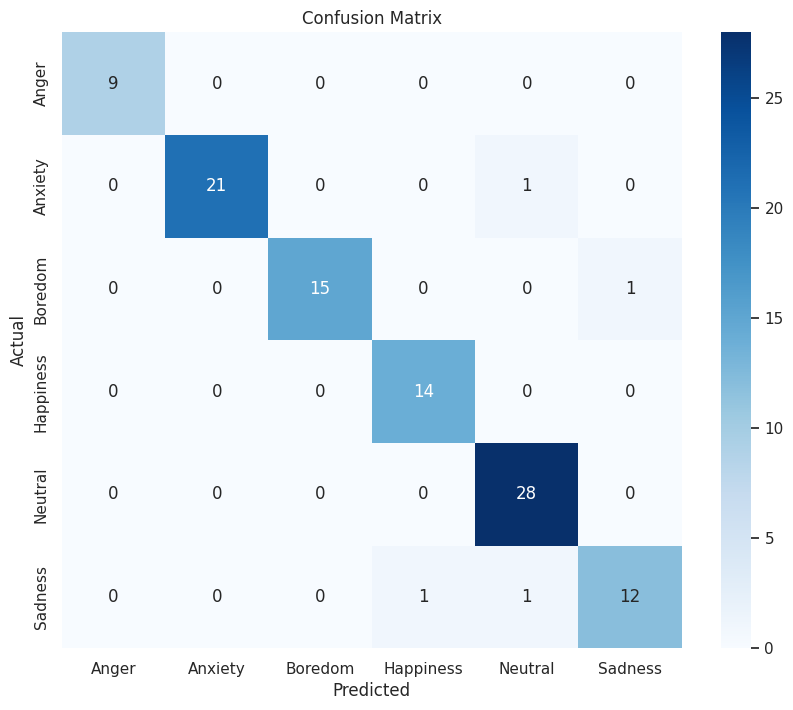

In [54]:
# Predict classes for the test set
y_test_pred = model.predict(X_test)
# Convert predictions to class labels (assuming you're doing classification)
y_test_pred_classes = np.round(y_test_pred).astype(int)  # or any other appropriate method to get class labels

# y_test is already your true labels (y_true), so no need to apply argmax
y_test_true_classes = y_test.astype(int)  # Ensure y_test is of integer type


# Verify the correct number of classes and target names
unique_labels = np.unique(y_test_true_classes)
unique_label_names = label_encoder.inverse_transform(unique_labels)

# Generate classification report
# print("\nClassification Report:")
# print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=unique_label_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=unique_label_names, yticklabels=unique_label_names, cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Generate classification report for all models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\nClassification Report for", model[0])
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print('-' * 50)
    # Generate ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    